In [176]:
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from geopy.geocoders import Nominatim

## Geotagging the scraped Data

In [177]:
df = pd.read_csv('all_reviews.csv')
locations_df = pd.read_csv('locations_geotagged.csv')
beer_df = pd.read_csv('beer_deets.csv')

In [178]:
df

,beer_name,beer_rating,brewery_location,brewery_name,review_content,reviewer_name
0,St. Peter's Ruby Red Ale,3.3,"Bungay, Suffolk",St. Peter's Brewery,"Ruby color, offwhite coam. Aroma and taste: fl...",alex_leit
1,Shepherd Neame Spitfire (Bottle),2.2,"Faversham, Kent",Shepherd Neame,Disappointing show from the lads at ‘Britain’s...,shivermetimber.gray
2,Arbor Rocketman,3.8,"Bristol, Gloucestershire",Arbor Ales,"Puszka. Mętne o żółtym kolorze. Piana biała,ob...",MarcinG
3,Shepherd Neame India Pale Ale (Bottle),3.4,"Faversham, Kent",Shepherd Neame,Bottle. Amber with bronze color and white foam...,alex_leit
4,Shepherd Neame Christmas Ale,3.3,"Faversham, Kent",Shepherd Neame,Bottle. Aroma: English hops and malts with tof...,alex_leit
...,...,...,...,...,...,...
23286,Lagunitas Newcastle Brown Ale (US version),1.0,-1.7,Lagunitas Brewing Company (Heineken),"Bottle from BevMo, Oceanside, Ca. Why is this ...",ChrisOfstad
23287,Samuel Smiths India Ale,1.8,-1.6,Samuel Smith,"Bought Nov 8, 2019, at 'Gastronom', Izhevsk, R...",PastorGL
23288,Big Smoke Cosmic Dawn,0.5,-2.5,Big Smoke Brew Co.,On cask at Euston Tap. clear gold colour lasti...,harrisoni
23289,Bath Gem (Bottle),1.6,-1.5,Bath Ales (St. Austell),500ml bottle in 2015. I don’t know quite what ...,Beese


In [179]:
locations_df

,locations,latitude,longitude,country
0,"Bungay, Suffolk",52.456225,1.437341,United Kingdom
1,"Faversham, Kent",51.314409,0.891189,United Kingdom
2,"Bristol, Gloucestershire",51.852767,-2.255369,United Kingdom
3,"Round Rock, Texas",30.508235,-97.678893,United States of America
4,"Brooklyn, New York",40.650104,-73.949582,United States of America
...,...,...,...,...
2136,"Hagerstown, Maryland",39.641922,-77.720264,United States of America
2137,"Ashford, Kent",51.148555,0.872257,United Kingdom
2138,"Rauhenebrach-Theinheim, Bavaria",49.890429,10.583460,Germany
2139,"Moosbach, Bavaria",49.591660,12.408016,Germany


In [180]:
geolocator = Nominatim(user_agent="None")

In [181]:
locations_new = pd.DataFrame(df.brewery_location[~df.brewery_location.isin(locations_df.locations)].unique(),columns=['locations'])
print(len(locations_new), "new locations to search for! Will take", len(locations_new)/2, "seconds to run.")

18 new locations to search for! Will take 9.0 seconds to run.


In [182]:
def tryconvert(x):
        try:
            return geolocator.geocode(x).latitude
        except:
            return None
    

In [183]:
def tryconvertlong(x):
        try:
            return geolocator.geocode(x).longitude
        except:
            return None

In [184]:
locations_new["latitude"] = locations_new.locations.apply(lambda x: tryconvert(x))

In [185]:
locations_new["longitude"] = locations_new.locations.apply(lambda x: tryconvertlong(x))

In [186]:
countries = []
for row in locations_new.index:
    try:
        loc = geolocator.reverse([locations_new.iloc[row,1],locations_new.iloc[row,2]], language='en')
        countries.append(loc.raw['address']['country'])
    except:
        countries.append(None)
        
    

In [187]:
locations_new['country'] = countries

In [188]:
locations_new

,locations,latitude,longitude,country
0,"Downton, Wiltshire",50.994234,-1.750232,United Kingdom
1,"Long Lake, Minnesota",44.986389,-93.571591,United States of America
2,"Pocatello, Idaho",42.868861,-112.440110,United States of America
3,"Peachtree City, Georgia",33.396783,-84.595763,United States of America
4,"Edgartown, Massachusetts",41.389005,-70.513360,United States of America
5,"Bellevue, Kentucky",39.106708,-84.482648,United States of America
6,"Orange, Massachusetts",42.606377,-72.290250,United States of America
7,"Beaverton, Oregon",45.487172,-122.803780,United States of America
8,"Bristol, Somerset",41.769546,-71.128656,United States of America
9,"New Hamburg, Ontario",43.378422,-80.709772,Canada


In [189]:
locations_df = pd.concat([locations_df,locations_new])
locations_df.to_csv('locations_geotagged.csv',index=False)

## Deal with Non-English Descriptions

## Merging and cleaning

In [190]:
beer_df

,return_string,flag,type,abv,rb_overall_score,rb_style_score,rb_user_rating,rb_rating_number,name_found
0,St. Peter's Ruby Red Ale\n🇬🇧 Bitter - Ordinary...,🇬🇧,Bitter - Ordinary / Best,4.3,49,95,3.25,415.0,St. Peter's Ruby Red Ale
1,Shepherd Neame Spitfire (Bottle)\n🇬🇧 Bitter - ...,🇬🇧,Bitter - Ordinary / Best,4.5,34,59,3.05,1083.0,Shepherd Neame Spitfire (Bottle)
2,Arbor Rocketman\n🇬🇧 IPA • 6.0%\n95\n97\n3.74\n...,🇬🇧,IPA,6.0,95,97,3.74,59.0,Arbor Rocketman
3,Shepherd Neame India Pale Ale (Bottle)\n🇬🇧 IPA...,🇬🇧,IPA - English,6.1,46,47,3.22,420.0,Shepherd Neame India Pale Ale (Bottle)
4,Shepherd Neame Christmas Ale\n🇬🇧 Strong Ale - ...,🇬🇧,Strong Ale - English,7.0,45,46,3.18,409.0,Shepherd Neame Christmas Ale
...,...,...,...,...,...,...,...,...,...
12639,Crooked Stave Double Barrel Salvador Cybies\n🇺...,🇺🇸,Sour / Wild Beer,0.0,-,-,3.97,6.0,Crooked Stave Double Barrel Salvador Cybies
12640,Brewing Projekt Things Of That Nature: Intensi...,🇺🇸,IIPA DIPA - Hazy / Double NEIPA,NaN,-,-,3.50,2.0,Brewing Projekt Things Of That Nature: Intensi...
12641,Le Trou du Diable Kaléidoscope IPA\n🇨🇦 IPA\n-\...,🇨🇦,IPA,NaN,-,-,3.30,1.0,Le Trou du Diable Kaléidoscope IPA
12642,Brand IPA 0.0\n🇳🇱 IPA\n-\n-\n2.75\n(4),🇳🇱,IPA,NaN,-,-,2.75,4.0,Brand IPA 0.0


In [207]:
# Creating DF with all details
df_all = pd.merge(df,locations_df,how='left',left_on='brewery_location',right_on='locations')
df_all = pd.merge(df_all, beer_df, how='left', left_on='beer_name',right_on='name_found')
df_all


,beer_name,beer_rating,brewery_location,brewery_name,review_content,reviewer_name,locations,latitude,longitude,country,return_string,flag,type,abv,rb_overall_score,rb_style_score,rb_user_rating,rb_rating_number,name_found
0,St. Peter's Ruby Red Ale,3.3,"Bungay, Suffolk",St. Peter's Brewery,"Ruby color, offwhite coam. Aroma and taste: fl...",alex_leit,"Bungay, Suffolk",52.456225,1.437341,United Kingdom,St. Peter's Ruby Red Ale\n🇬🇧 Bitter - Ordinary...,🇬🇧,Bitter - Ordinary / Best,4.3,49,95,3.25,415.0,St. Peter's Ruby Red Ale
1,Shepherd Neame Spitfire (Bottle),2.2,"Faversham, Kent",Shepherd Neame,Disappointing show from the lads at ‘Britain’s...,shivermetimber.gray,"Faversham, Kent",51.314409,0.891189,United Kingdom,Shepherd Neame Spitfire (Bottle)\n🇬🇧 Bitter - ...,🇬🇧,Bitter - Ordinary / Best,4.5,34,59,3.05,1083.0,Shepherd Neame Spitfire (Bottle)
2,Arbor Rocketman,3.8,"Bristol, Gloucestershire",Arbor Ales,"Puszka. Mętne o żółtym kolorze. Piana biała,ob...",MarcinG,"Bristol, Gloucestershire",51.852767,-2.255369,United Kingdom,Arbor Rocketman\n🇬🇧 IPA • 6.0%\n95\n97\n3.74\n...,🇬🇧,IPA,6.0,95,97,3.74,59.0,Arbor Rocketman
3,Shepherd Neame India Pale Ale (Bottle),3.4,"Faversham, Kent",Shepherd Neame,Bottle. Amber with bronze color and white foam...,alex_leit,"Faversham, Kent",51.314409,0.891189,United Kingdom,Shepherd Neame India Pale Ale (Bottle)\n🇬🇧 IPA...,🇬🇧,IPA - English,6.1,46,47,3.22,420.0,Shepherd Neame India Pale Ale (Bottle)
4,Shepherd Neame Christmas Ale,3.3,"Faversham, Kent",Shepherd Neame,Bottle. Aroma: English hops and malts with tof...,alex_leit,"Faversham, Kent",51.314409,0.891189,United Kingdom,Shepherd Neame Christmas Ale\n🇬🇧 Strong Ale - ...,🇬🇧,Strong Ale - English,7.0,45,46,3.18,409.0,Shepherd Neame Christmas Ale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23513,Lagunitas Newcastle Brown Ale (US version),1.0,-1.7,Lagunitas Brewing Company (Heineken),"Bottle from BevMo, Oceanside, Ca. Why is this ...",ChrisOfstad,-1.7,48.780313,10.039726,Germany,Lagunitas Newcastle Brown Ale (US version)\n🇺🇸...,🇺🇸,Brown Ale,4.7,15,9,1.47,10.0,Lagunitas Newcastle Brown Ale (US version)
23514,Samuel Smiths India Ale,1.8,-1.6,Samuel Smith,"Bought Nov 8, 2019, at 'Gastronom', Izhevsk, R...",PastorGL,-1.6,48.718182,9.989251,Germany,Samuel Smiths India Ale\n🇬🇧 Bitter - Premium /...,🇬🇧,Bitter - Premium / Strong / ESB,5.0,71,96,3.39,1694.0,Samuel Smiths India Ale
23515,Big Smoke Cosmic Dawn,0.5,-2.5,Big Smoke Brew Co.,On cask at Euston Tap. clear gold colour lasti...,harrisoni,-2.5,50.814444,14.361805,Czech Republic,Big Smoke Cosmic Dawn\n🇬🇧 Pale Ale - American ...,🇬🇧,Pale Ale - American / APA,4.1,29,17,3.01,12.0,Big Smoke Cosmic Dawn
23516,Bath Gem (Bottle),1.6,-1.5,Bath Ales (St. Austell),500ml bottle in 2015. I don’t know quite what ...,Beese,-1.5,52.583680,13.276598,Germany,Bath Gem (Bottle)\n🇬🇧 Bitter - Premium / Stron...,🇬🇧,Bitter - Premium / Strong / ESB,4.8,40,51,3.15,303.0,Bath Gem (Bottle)


In [208]:
# drop excess columns
df_all.drop(["locations","return_string","name_found"],axis=1,inplace=True)
# drop rows with ratings instead of location
df_all = df_all[~df_all['brewery_location'].str.len()<4]
# drop all NaNs
print(len(df_all) - len(df_all.dropna()), "columns with NaNs dropped.")
df_all.dropna(inplace=True)


1731 columns with NaNs dropped.


In [209]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21787 entries, 0 to 23517
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   beer_name         21787 non-null  object 
 1   beer_rating       21787 non-null  float64
 2   brewery_location  21787 non-null  object 
 3   brewery_name      21787 non-null  object 
 4   review_content    21787 non-null  object 
 5   reviewer_name     21787 non-null  object 
 6   latitude          21787 non-null  float64
 7   longitude         21787 non-null  float64
 8   country           21787 non-null  object 
 9   flag              21787 non-null  object 
 10  type              21787 non-null  object 
 11  abv               21787 non-null  float64
 12  rb_overall_score  21787 non-null  object 
 13  rb_style_score    21787 non-null  object 
 14  rb_user_rating    21787 non-null  object 
 15  rb_rating_number  21787 non-null  float64
dtypes: float64(5), object(11)
memory usage: 

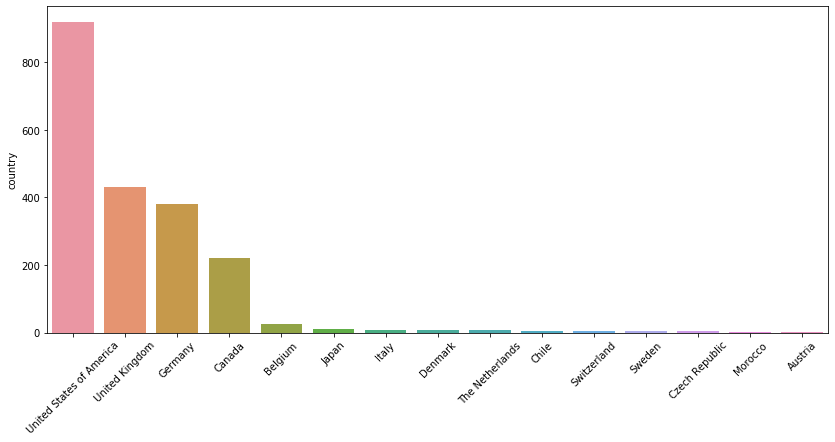

In [194]:
# Where the beers are from
plt.figure(figsize=(14,6))
ax = sns.barplot(x=locations_df.country.value_counts().head(15).index,y=locations_df.country.value_counts().head(15))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

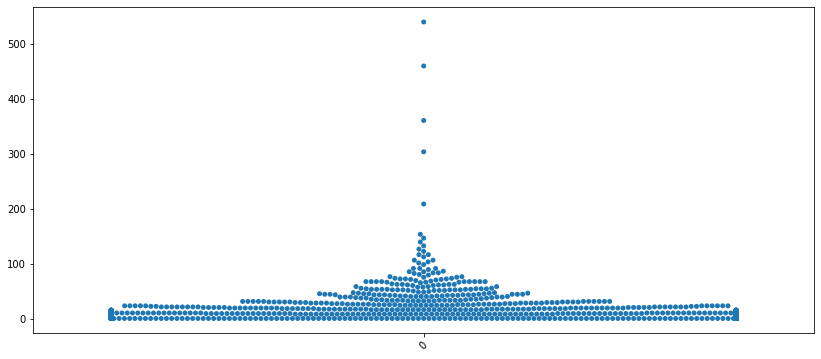

In [195]:
plt.figure(figsize=(14,6))
ax = sns.swarmplot(data = df.groupby("reviewer_name").review_content.count())
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [196]:
df.groupby("reviewer_name").review_content.count()

reviewer_name
101poodles       7
151rum           7
17Beer          28
2OLD4BS         24
2mutchbeer41     2
                ..
zizzybalubba     6
zombywoof        1
zoucrew102      73
zvikar          11
zvsn            29
Name: review_content, Length: 2383, dtype: int64

In [197]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=)
plt.show()

SyntaxError: invalid syntax (<ipython-input-197-139d7ca9f737>, line 2)